In [1]:
# Importing Packages.
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define transforms.
transform = transforms.Compose([ transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5, )) ])

# Loading data.
trainset = datasets.MNIST(root='../Data/', download=True, train=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

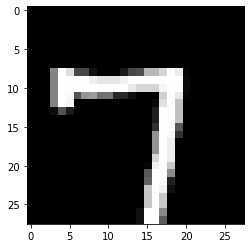

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r')
plt.show()

In [4]:
# Network class.
class Net(nn.Module):

    # Constructor.
    def __init__(self):
        super().__init__()

        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        self.logsoftmax = nn.LogSoftmax(dim=1)

    # Feed-forward.
    def forward(self, x):

        x = F.relu(self.hidden(x))
        x = self.output(x)
        x = self.logsoftmax(x)

        return x

model = Net()

In [5]:
# Loss function.
criterion = nn.NLLLoss()

In [6]:
# Optimizer.
optimizer = torch.optim.SGD(model.parameters(), lr=0.003)

In [7]:
# Training.
COST = []
epochs = 10
for epoch in range(epochs):
    for images, labels in trainloader:

        # Flatten images.
        images = images.view(images.shape[0], -1)

        # Forward pass.
        output = model(images)

        # Compute loss.
        loss = criterion(output, labels)

        # Backward pass.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Cost after {epoch}th iteration: {loss}")
    COST.append(loss)

Cost after 0th iteration: 0.7943886518478394
Cost after 1th iteration: 0.47913166880607605
Cost after 2th iteration: 0.3284631371498108
Cost after 3th iteration: 0.4723513722419739
Cost after 4th iteration: 0.6624881029129028
Cost after 5th iteration: 0.21223296225070953
Cost after 6th iteration: 0.16771215200424194
Cost after 7th iteration: 0.2524533271789551
Cost after 8th iteration: 0.2660757303237915
Cost after 9th iteration: 0.2799394726753235


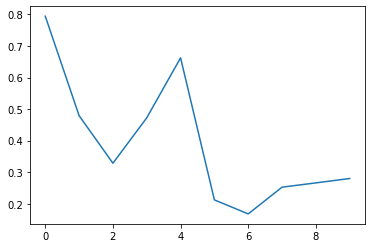

In [8]:
# Cost curve.
plt.plot(COST)
plt.show()

Predicted Number: 6


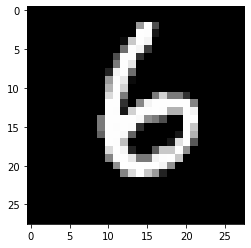

In [9]:
# Prediction.
images, labels = next(iter(trainloader))
img = images[0].view(1, 784)

with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
print("Predicted Number:", np.argmax(ps[0]).numpy())
plt.imshow(images[0].numpy().squeeze(), cmap="Greys_r")
plt.show()